# HeadSize- BrainWeight Use Case
Problem Statement:
     Headsize-Brainweight  Use Case

The size of the brain is a frequent topic of study within the fields of anatomy, biological anthropology, animal science and evolution. Brain size is sometimes measured by weight and sometimes by volume (via MRI scans or by skull volume). 

Regarding "intelligence testing", a question that has been frequently investigated is the relation of brain size to intelligence. There are many ways to assess a person's intelligence. But Ed Klaber of Chelmsford, England, came up with one of his own. He wants to know if people with bigger heads have bigger brains. It is said that measuring the size of the head does give some indication of how big the brain is. 

Even though head size also depends on factors such as the muscularity of the head and thickness of the bone, it's very likely that a bigger head means a bigger brain. Thus, it seems that head size and the brain weight are very much related to each other in scientific terms. In this demonstration, we will try to prove this using machine learning. 

Generally, the Head size of humans gives impressions of the weight of brain. Thus, here we will try to predict the "Brain Weight" of the person using the "Head Size".

Below, you can find the dataset for this use case. The Head Brain file consist of four attributes (Gender, Age, Headsize, Brainweight) .

You have to train the machine for learning the size of head and the corresponding brain weight. Then, after learning/training, it should be able to predict the brain weight given on certain head size. 

Make sure to follow the steps mentioned below: 

Complete the Exploratory Data Analysis(EDA).
Understand the type of the problem and apply the appropriate model for its training and testing phase.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('brain_weight.csv')
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Top 5 heads of the dataset.

In [3]:
df.tail()

,Gender,AgeRange,HeadSize,BrainWeight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


Bottom 5 of the dataset.

# EDA

In [4]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


All the columns is of integer data type.

In [5]:
# checking shape
df.shape

(237, 4)

We have 237 rows and 4 columns in the dataset.

In [6]:
# checking null values
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

No null values are present in the dataset.

# Visualization of nominal data

1    134
2    103
Name: Gender, dtype: int64


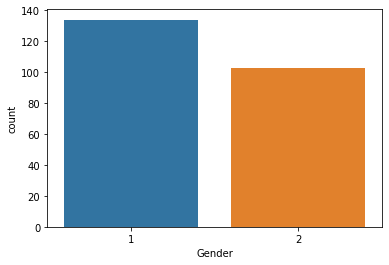

In [7]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Here 1 is representing the male and 2 is for female . the total number of 1 is 134 and the total number of 2 is 103, there is not much nticable differnce between 1 and 2.

2    127
1    110
Name: AgeRange, dtype: int64


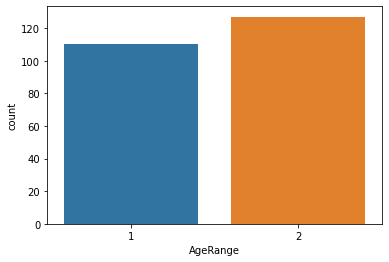

In [8]:
ax=sns.countplot('AgeRange',data=df)
print(df['AgeRange'].value_counts())

Nor much difference between 1 and 2 in AgeRange column

# Visualization of numeric data

<AxesSubplot:xlabel='HeadSize', ylabel='Density'>

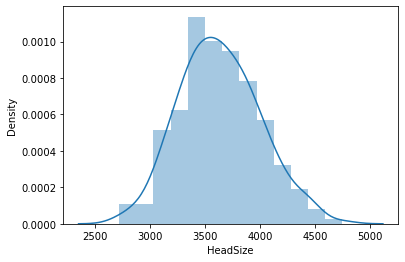

In [9]:
sns.distplot(df['HeadSize'],kde=True)

Dist plot is showing nice bell shaped curve of HeadSize column and its ranges in between 2500 to 5000.

<AxesSubplot:xlabel='BrainWeight', ylabel='Density'>

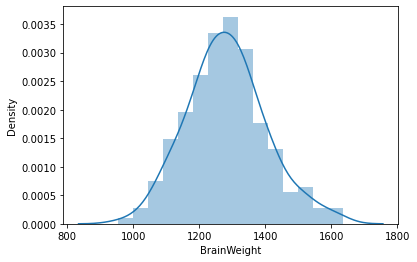

In [10]:
sns.distplot(df['BrainWeight'],kde=True)

BrainWeight column is our target column and it is lokking normally distributed ranges between 800 to 1800.

# Bivariate analysis

In [ ]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Date  and AveragePrice')
sns.scatterplot(df['Date'], df['AveragePrice'],hue=df['AveragePrice'])

<AxesSubplot:title={'center':'Comaprison between Head size and Age Range'}, xlabel='HeadSize', ylabel='BrainWeight'>

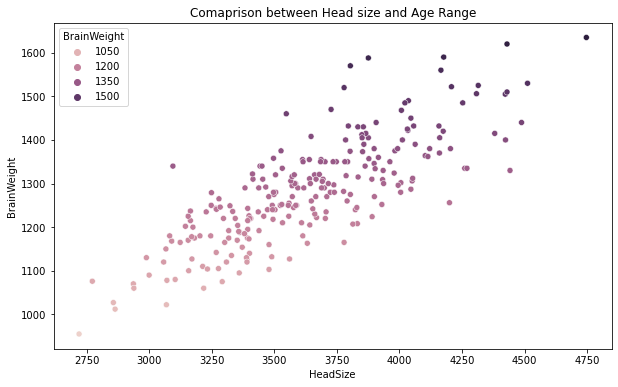

In [17]:
plt.figure(figsize=[10,6])
plt.title('Comaprison between Head size and Brain weight')
sns.scatterplot(df['HeadSize'],df['BrainWeight'],hue=df['BrainWeight'])

positive comparison between HeadSize and BrainWeight.

# Statistical Summary

In [18]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


Number of values is same in all the columns.

Independent Data is not deviated.

Not Much difference between mean and median(50%) in any of the columns.

There is also not much difference btween 75% and max in any of the columns.

# Checking correlations

<AxesSubplot:>

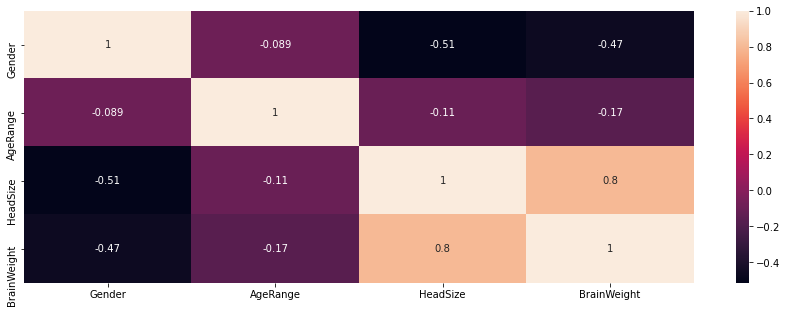

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

Gender and AgeRange column negatively correlated with target column BrainWeight.

HeadSize column is positively correlated with target column BrainWeight.

HeadSize is negatively correlated with Gender and AgeRange.





# Checking outliers

Gender             AxesSubplot(0.125,0.71587;0.352273x0.16413)
AgeRange        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
HeadSize          AxesSubplot(0.125,0.518913;0.352273x0.16413)
BrainWeight    AxesSubplot(0.547727,0.518913;0.352273x0.16413)
dtype: object

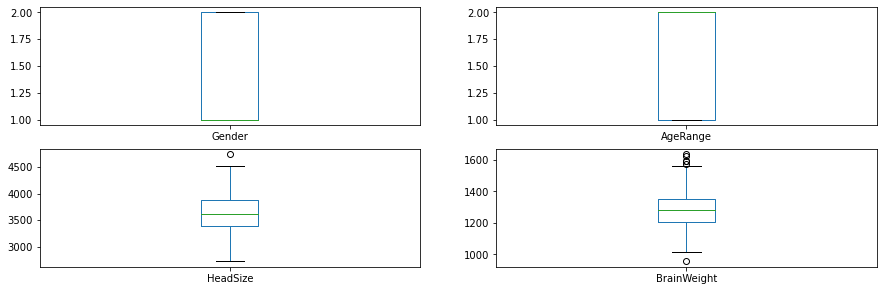

In [23]:
df.plot(kind='box',subplots=True, layout=(4,2), figsize=(15,10))

There is very little outlier in HeadSize column but we will not remove it because we have very less dataset and outliers are present in the target column so wil not be removed in target column.

# Checking Skewness

In [24]:
df.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

Dataset is not skewed.

# Seprating the Dataset into x and y

In [33]:
x=df.drop('BrainWeight',axis=1)
y=df['BrainWeight']

In [34]:
x.shape

(237, 3)

In [35]:
y.shape

(237,)

# Lets bring all features to a common scale

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


# Model Building

In [39]:
# Importing LIbraries
from sklearn.linear_model import LinearRegression , Lasso , Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [40]:
# Linear Regerssion
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 8.526512829121202e-14
mean squared error 1.8848516562080708e-26
root mean squared error 1.3728989970890324e-13


In [41]:
# cross validation linear regerssion
score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))


cv score 1.0


r2 score is 100% and cv score is 100%.

In [42]:
# Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9999339368491159
error
mean absolute error 0.7745834867904193
mean squared error 1.0379589942368084
root mean squared error 1.0188027258683638


In [43]:
# cross validation
score=cross_val_score(rd,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9998873095480694


r2 score is 99% and cv score is 99%.

In [45]:
# lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9999268798838262
error
mean absolute error 0.8365618245953167
mean squared error 1.1488353375005815
root mean squared error 1.0718373652287838


In [46]:
# cross validation Lasso
score=cross_val_score(ls,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9998827331922906


r2 score is 99.99% and cv score is 99.98%.

In [50]:
# ElasticNet
enc=ElasticNet()
enc.fit(x_train,y_train)
pred_y=enc.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9119291252813518
error
mean absolute error 29.617726874619397
mean squared error 1383.7359453980832
root mean squared error 37.19860139034912


In [51]:
# cross validation
score=cross_val_score(enc,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8574187893245911


r2 score is 91.19% and cv score 85.74%

# Ensemble Technique

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[0,5]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto'}


In [54]:
rf=RandomForestRegressor(criterion='mae',max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cv score',rfc*100)

r2 score 99.48018322981092
cv score 99.37432109674624


r2 score is 99.48%  and cv score is 99.37%

# Saving the model

In [56]:
import pickle
filename='brain_weight.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [57]:
loaded_model=pickle.load(open('brain_weight.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9948018322981093


In [58]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
predicted,1126.18,1222.965,1179.09,1223.66,1072.595,1352.07,1238.35,1315.15,1079.525,1351.77,...,1219.18,1300.2,1137.245,1486.515,1206.215,1208.735,1220.415,1338.82,1307.695,1250.16
original,1126.18,1222.965,1179.09,1223.66,1072.595,1352.07,1238.35,1315.15,1079.525,1351.77,...,1219.18,1300.2,1137.245,1486.515,1206.215,1208.735,1220.415,1338.82,1307.695,1250.16


With the help of Project , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Average Price.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.